# Set up Data Retreival

In [88]:
# crs_text = "ESRI:102005"
crs_text = "EPSG:2263"
# crs_text = "EPSG:26918"

In [89]:
import geopandas as gpd
import urllib.request
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [90]:
# Retrieve Census Tiger Shapefile

# Set the download URL, file name and folder path
url = "https://www2.census.gov/geo/tiger/TIGER2019/BG/tl_2019_36_bg.zip"
filename = "tl_2019_36_bg.zip"
folder_path = "./data/ny_blockgroup_shapefile"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.mkdir(folder_path)

# Check if the shapefile exists, otherwise download and unzip it
if not os.path.exists(os.path.join(folder_path, "tl_2019_36_bg.shp")):
    # Download and unzip the shapefile
    urllib.request.urlretrieve(url, os.path.join(folder_path, filename))
    with zipfile.ZipFile(os.path.join(folder_path, filename), 'r') as zip_ref:
        zip_ref.extractall(folder_path)

# Read the shapefile into a geopandas GeoDataFrame
gdf = gpd.read_file(os.path.join(folder_path, "tl_2019_36_bg.shp"), crs=crs_text)

# '085' for Staten Island is removed for its lack of GTFS files
nyc_counties_fp = ['005', '047', '061', '081'] # FIPS codes for New York City counties
nyc_gdf = gdf[gdf['COUNTYFP'].isin(nyc_counties_fp)]
nyc_gdf = nyc_gdf.reset_index(drop=True)
nyc_gdf['GEOID'] = nyc_gdf['GEOID'].astype('int64')


In [91]:
# Retrieve Presaved networkx results

# Read the networkx_analysis.csv file into a pandas DataFrame
networkx_df = pd.read_csv("./data/networkx_analysis_results/networkx_analysis.csv")

# Convert the networkx_df DataFrame to a geopandas GeoDataFrame and create circles around each station
networkx_gdf = gpd.GeoDataFrame(
    networkx_df,
    geometry=gpd.points_from_xy(networkx_df.stop_lon, networkx_df.stop_lat),
    crs=crs_text
)

# Create a 1km buffer around the points in networkx_gdf
networkx_gdf_buffered = networkx_gdf.copy()

# Change the CRS to the desired CRS
networkx_gdf_buffered = networkx_gdf_buffered.to_crs(crs_text)
networkx_gdf_buffered.geometry = networkx_gdf_buffered.buffer(0.03)

# Convert the buffered points to a GeoDataFrame
networkx_gdf_buffered = gpd.GeoDataFrame(networkx_gdf_buffered)

In [92]:
# Retrieve Presaved Social Explorer NYC Blockgroup data results

sebg_df = pd.read_csv('./data/socialexplorer_nyc_blockgroup_data/socialexplorer_nyc_blockgroup_data.csv', header=1, delimiter=',')

In [93]:
# Join the two dataframes
nyc_df = pd.merge(sebg_df, nyc_gdf, left_on='Geo_FIPS', right_on='GEOID')
nyc_gdf = gpd.GeoDataFrame(nyc_df, geometry='geometry')

# Create Prelim Maps

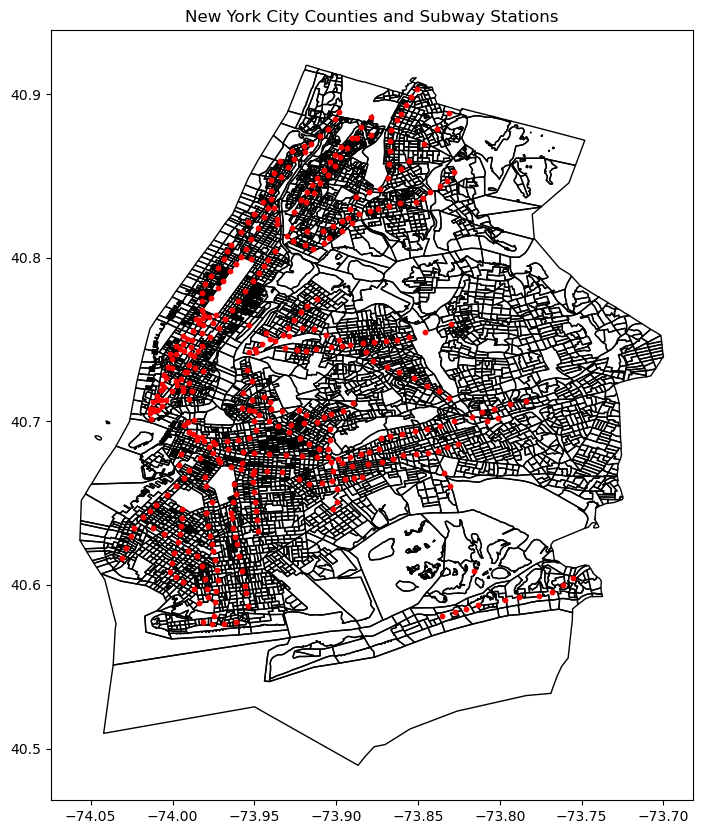

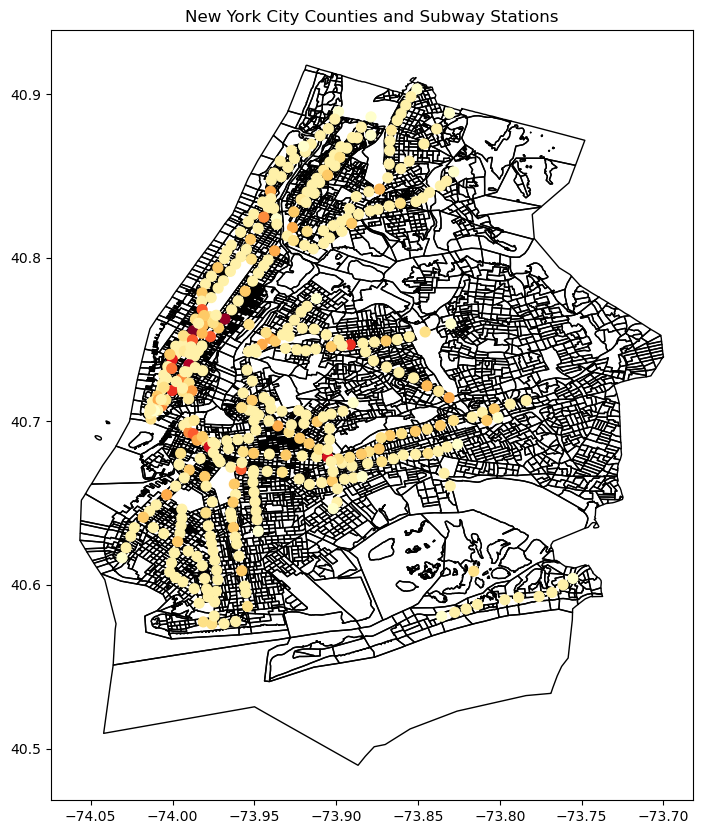

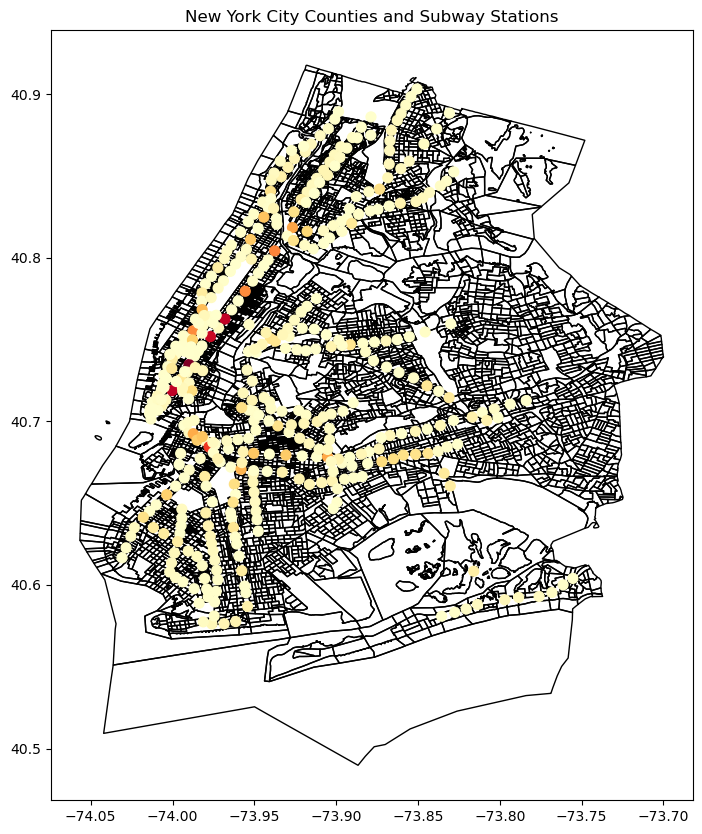

In [94]:
# Create a map of New York City counties and overlay the station locations
fig, ax = plt.subplots(figsize=(10, 10))
nyc_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
# networkx_gdf.plot(ax=ax, column='dgrs', cmap='YlOrRd', markersize=50)
networkx_gdf.plot(ax=ax, color='red', markersize=10)
ax.set_title('New York City Counties and Subway Stations')
plt.show()


# Create a map of New York City counties and overlay the station locations
fig, ax = plt.subplots(figsize=(10, 10))
nyc_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
networkx_gdf.plot(ax=ax, column='dgrs', cmap='YlOrRd', markersize=50)
# stations_networkx_gdf.plot(ax=ax, color='red', markersize=10)
ax.set_title('New York City Counties and Subway Stations')
plt.show()


# Create a map of New York City counties and overlay the station locations
fig, ax = plt.subplots(figsize=(10, 10))
nyc_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
networkx_gdf.plot(ax=ax, column='btwn', cmap='YlOrRd', markersize=50)
# stations_networkx_gdf.plot(ax=ax, color='red', markersize=10)
ax.set_title('New York City Counties and Subway Stations')
plt.show()

# Clean Data

In [95]:
for col in nyc_gdf.columns:
    print(col)

Geo_FIPS
Geo_NAME
Geo_QName
Geo_STUSAB
Geo_SUMLEV
Geo_GEOCOMP
Geo_FILEID
Geo_LOGRECNO
Geo_US
Geo_REGION
Geo_DIVISION
Geo_STATECE
Geo_STATE
Geo_COUNTY
Geo_COUSUB
Geo_PLACE
Geo_PLACESE
Geo_TRACT
Geo_BLKGRP
Geo_CONCIT
Geo_AIANHH
Geo_AIANHHFP
Geo_AIHHTLI
Geo_AITSCE
Geo_AITS
Geo_ANRC
Geo_CBSA
Geo_CSA
Geo_METDIV
Geo_MACC
Geo_MEMI
Geo_NECTA
Geo_CNECTA
Geo_NECTADIV
Geo_UA
Geo_UACP
Geo_CDCURR
Geo_SLDU
Geo_SLDL
Geo_VTD
Geo_ZCTA3
Geo_ZCTA5
Geo_SUBMCD
Geo_SDELM
Geo_SDSEC
Geo_SDUNI
Geo_UR
Geo_PCI
Geo_TAZ
Geo_UGA
Geo_PUMA5
Geo_PUMA1
Geo_GEOID
Geo_BTTR
Geo_BTBG
Geo_AREALAND
Geo_AREAWATR
ACS19_5yr_B01001001
ACS19_5yr_B01001002
ACS19_5yr_B01001003
ACS19_5yr_B01001004
ACS19_5yr_B01001005
ACS19_5yr_B01001006
ACS19_5yr_B01001007
ACS19_5yr_B01001008
ACS19_5yr_B01001009
ACS19_5yr_B01001010
ACS19_5yr_B01001011
ACS19_5yr_B01001012
ACS19_5yr_B01001013
ACS19_5yr_B01001014
ACS19_5yr_B01001015
ACS19_5yr_B01001016
ACS19_5yr_B01001017
ACS19_5yr_B01001018
ACS19_5yr_B01001019
ACS19_5yr_B01001020
ACS19_5yr_B01001021
A

In [96]:
# TODO: Remove parks and/or water via a filter
# nyc_gdf WHERE ALAND is greater than 0 and B01001001 / SQRT(ALAND) > 0.023
nyc_gdf = nyc_gdf[(nyc_gdf['ALAND'] > 0) & (nyc_gdf['ACS19_5yr_B01001001'] / nyc_gdf['ALAND'].apply(lambda x: pd.np.sqrt(x)) > 0.023)]

C:\Users\cjong\AppData\Local\Temp\ipykernel_5312\1896046974.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  nyc_gdf = nyc_gdf[(nyc_gdf['ALAND'] > 0) & (nyc_gdf['ACS19_5yr_B01001001'] / nyc_gdf['ALAND'].apply(lambda x: pd.np.sqrt(x)) > 0.023)]


In [97]:
nyc_gdf.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1,360050001001,Block Group 1,"Block Group 1, Census Tract 1, Bronx County, N...",ny,150,0,ACSSF,8590,NaN,NaN,...,1,360050001001,Block Group 1,G5030,S,1677210,0,+40.7911136,-073.8826858,"POLYGON ((-73.89266 40.79382, -73.89194 40.796..."
3,360050002001,Block Group 1,"Block Group 1, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8592,NaN,NaN,...,1,360050002001,Block Group 1,G5030,S,89013,0,+40.8139633,-073.8608664,"POLYGON ((-73.86333 40.81478, -73.86240 40.814..."
4,360050002002,Block Group 2,"Block Group 2, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8593,NaN,NaN,...,2,360050002002,Block Group 2,G5030,S,222104,0,+40.8116309,-073.8605956,"POLYGON ((-73.86522 40.81453, -73.86425 40.814..."
5,360050002003,Block Group 3,"Block Group 3, Census Tract 2, Bronx County, N...",ny,150,0,ACSSF,8594,NaN,NaN,...,3,360050002003,Block Group 3,G5030,S,168346,0,+40.8081798,-073.8566782,"POLYGON ((-73.85867 40.80683, -73.85832 40.806..."
7,360050004001,Block Group 1,"Block Group 1, Census Tract 4, Bronx County, N...",ny,150,0,ACSSF,8596,NaN,NaN,...,1,360050004001,Block Group 1,G5030,S,62874,0,+40.8139792,-073.8573467,"POLYGON ((-73.85960 40.81528, -73.85870 40.815..."


# Join Data

c:\Users\cjong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\cjong\AppData\Local\Temp\ipykernel_5312\1220408551.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:2263

  joined_gdf = gpd.sjoin(nyc_gdf, networkx_gdf_buffered, how='inner', op='intersects').groupby(['GEOID'])[['btwn']].mean().reset_index()


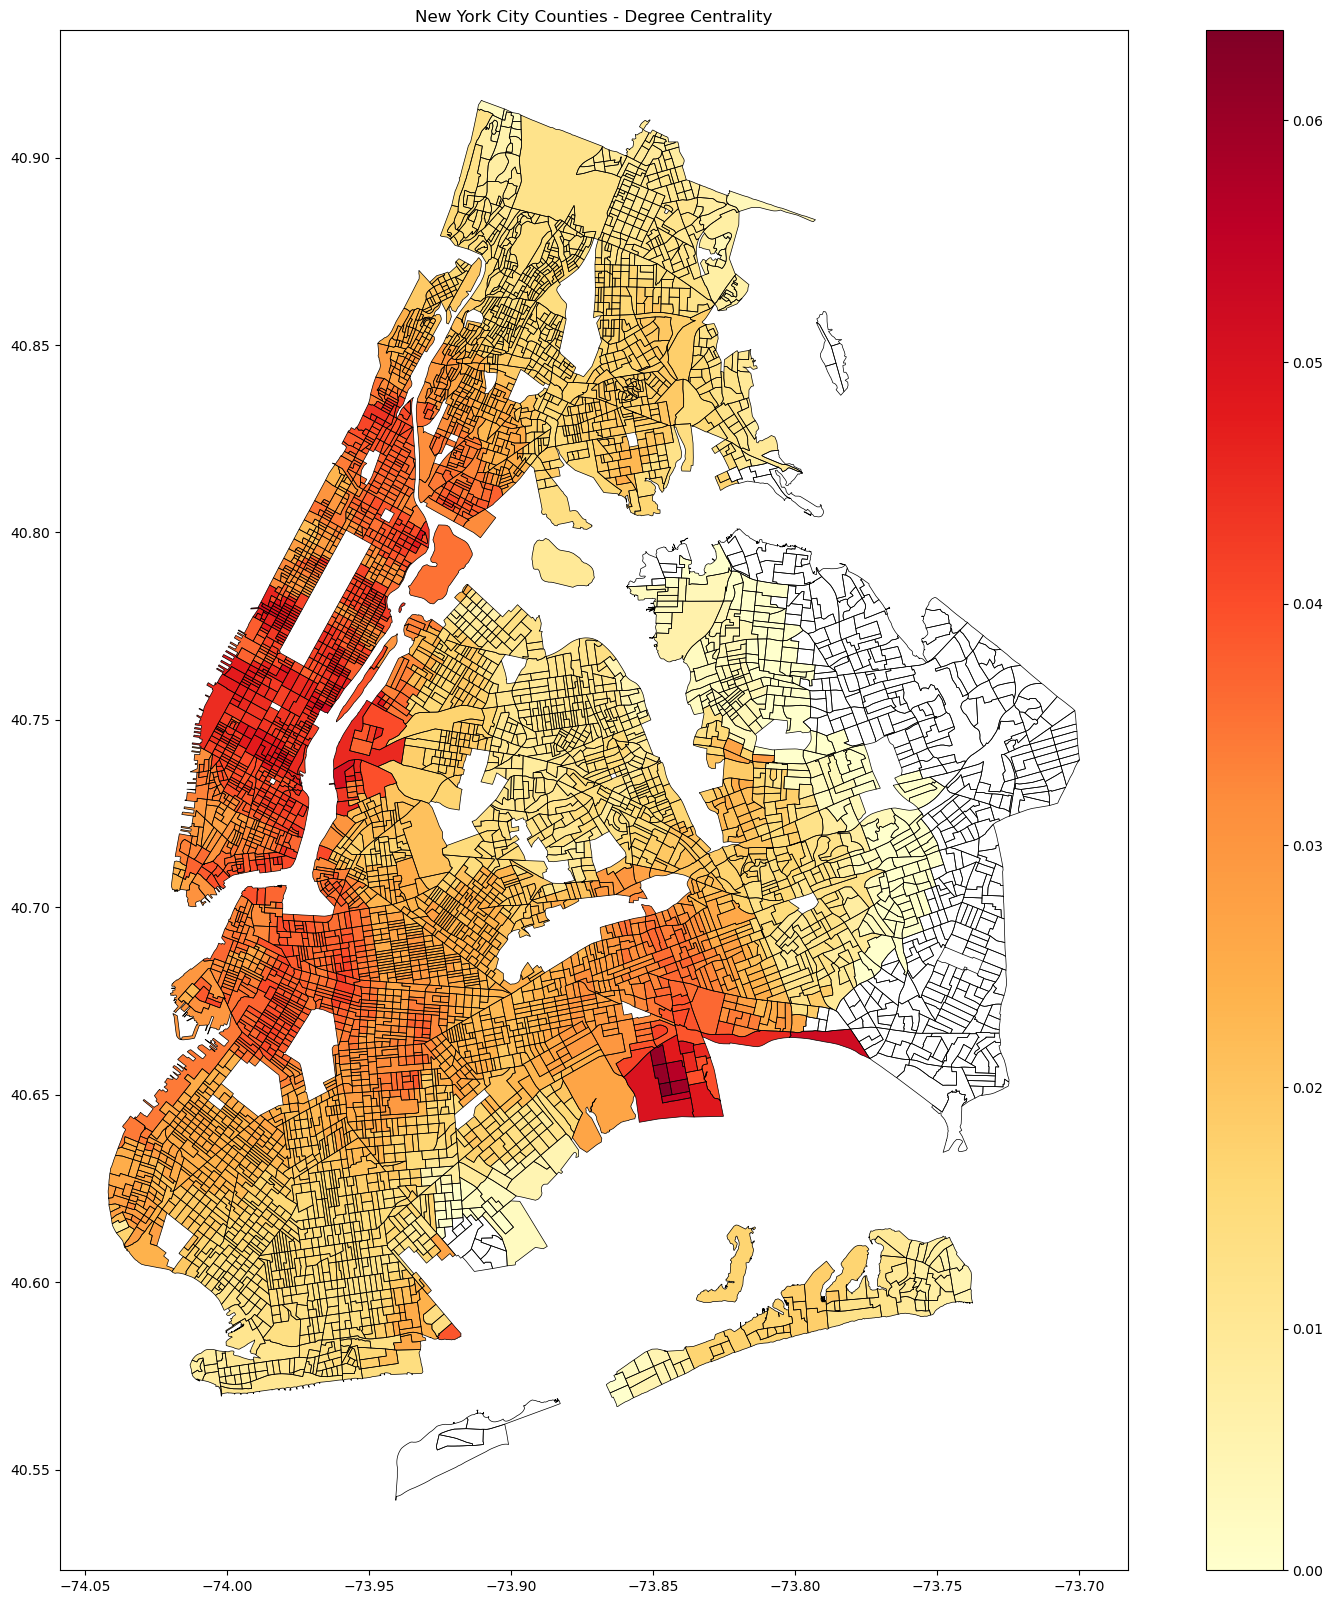

In [100]:
# Spatially join the two GeoDataFrames and aggregate the values of the 'column_to_summarize_1' and 'column_to_summarize_2' columns
joined_gdf = gpd.sjoin(nyc_gdf, networkx_gdf_buffered, how='inner', op='intersects').groupby(['GEOID'])[['btwn']].mean().reset_index()

# Merge joined_gdf and networkx_gdf_buffered on GEOID
joined_df = pd.merge(joined_gdf, nyc_gdf, on='GEOID')
joined_gdf = gpd.GeoDataFrame(joined_df, geometry='geometry')

# Create a choropleth map of New York City counties based on the degree centrality
fig, ax = plt.subplots(figsize=(20, 20))

# joined_gdf.plot(column='dgrs', cmap='YlOrRd', legend=True, ax=ax)
joined_gdf.plot(column='btwn', cmap='YlOrRd', legend=True, ax=ax)

# Add block group boundaries
nyc_gdf.plot(linewidth=0.5, edgecolor='black', facecolor='none', ax=ax)

# # Add circles for each point with the buffer radius as the circle's radius
# for point in networkx_gdf_buffered.itertuples():
#     ax.add_patch(Circle(xy=point.geometry.centroid.coords[0], radius=0.01, edgecolor='black', facecolor='none'))

ax.set_title('New York City Counties - Degree Centrality')
plt.show()